In [2]:
import geopandas as gpd
import pandas as pd

import numpy as np
from scipy.spatial import distance_matrix

from pathlib import Path

from contextlib import redirect_stdout
from io import StringIO
s=StringIO()

import seaborn as sns
import matplotlib.pyplot as plt

import os
import re

import ot

In [3]:
#%% parameters

n = 100  # nb bins

# bin positions
x = np.arange(n, dtype=np.float64)

# Gaussian distributions
a1 = ot.datasets.make_1D_gauss(n, m=20, s=5)  # m= mean, s= std
a2 = ot.datasets.make_1D_gauss(n, m=60, s=8)

# creating matrix A containing all distributions
A = np.vstack((a1, a2)).T
n_distributions = A.shape[1]

# loss matrix + normalization
M = ot.utils.dist0(n)
M /= M.max()

In [14]:
M.shape, A.shape

((100, 100), (100, 2))

In [13]:
M.dtype
A.shape

(100, 2)

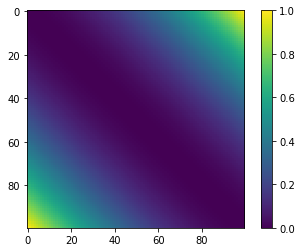

In [5]:
plt.imshow(M)
plt.colorbar()

In [6]:
 pd.DataFrame(A).melt()

variable         value
0           0  2.676658e-05
1           0  5.839056e-05
2           0  1.223828e-04
3           0  2.464488e-04
4           0  4.768272e-04
..        ...           ...
195         1  3.479256e-06
196         1  1.997968e-06
197         1  1.129549e-06
198         1  6.286887e-07
199         1  3.444930e-07

[200 rows x 2 columns]

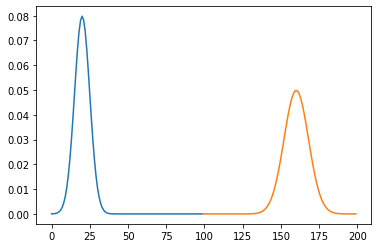

In [7]:
dfMelt=pd.DataFrame(A).melt()
colList=["red","blue"]
for i in set(dfMelt["variable"]):
    plt.plot( dfMelt.loc[dfMelt["variable"]==i, "value"] )
    
# The following plots the distribution of densities - this makes no sense
#for i in set(dfMelt["variable"]):
#    sns.distplot( dfMelt.loc[dfMelt["variable"]==i, "value"] , color = colList[i], kde=False )

In [15]:
#%% barycenter computation

alpha = 0.2  # 0<=alpha<=1
weights = np.array([1 - alpha, alpha])

# l2bary
bary_l2 = A.dot(weights)

# wasserstein
reg = 1e-3
bary_wass = ot.bregman.barycenter(A, M, reg, weights,verbose=True)
bary_wass

    1|9.905812e-01|
   11|5.865742e-01|
   21|2.036357e-01|
   31|6.468594e-02|
   41|2.037709e-02|
   51|6.415965e-03|
   61|2.020257e-03|
   71|6.361669e-04|
   81|2.003299e-04|
   91|6.308382e-05|


array([1.55176456e-10, 5.27190542e-10, 1.71865884e-09, 5.34132940e-09,
       1.57714457e-08, 4.41611949e-08, 1.17130116e-07, 2.94089282e-07,
       6.98907293e-07, 1.57301586e-06, 3.35783707e-06, 6.81590934e-06,
       1.32058318e-05, 2.45393628e-05, 4.39661581e-05, 7.63387886e-05,
       1.28993580e-04, 2.12745482e-04, 3.43058059e-04, 5.41319835e-04,
       8.36115852e-04, 1.26431065e-03, 1.87166730e-03, 2.71264804e-03,
       3.84900495e-03, 5.34679809e-03, 7.27159166e-03, 9.68178985e-03,
       1.26203776e-02, 1.61056998e-02, 2.01222909e-02, 2.46130721e-02,
       2.94743884e-02, 3.45552755e-02, 3.96619897e-02, 4.45682124e-02,
       4.90305215e-02, 5.28078383e-02, 5.56827720e-02, 5.74822666e-02,
       5.80948322e-02, 5.74819774e-02, 5.56822117e-02, 5.28070412e-02,
       4.90295348e-02, 4.45670913e-02, 3.96607926e-02, 3.45540587e-02,
       2.94732023e-02, 2.46119579e-02, 2.01212790e-02, 1.61048091e-02,
       1.26196166e-02, 9.68115823e-03, 7.27108225e-03, 5.34639912e-03,
      

In [16]:
ot.lp.barycenter(A, M, weights, solver='interior-point', verbose=True)


Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 1700.336700337      
0.007981810469265   0.007981810469265   0.007981810469265   0.9920187053159  0.007981810469264   202.1944584603      
0.005063305058729   0.005063305058728   0.005063305058729   0.386501209743   0.005063305058728   22.39207308289      
0.002164437862626   0.002164437862626   0.002164437862626   0.6154791632895  0.002164437862626   1.188288584501      
0.0006038902548866  0.0006038902548866  0.0006038902548866  0.7590320086218  0.0006038902548865  0.1990727653438     
0.0004847711367081  0.0004847711367081  0.0004847711367081  0.2114217791487  0.0004847711367081  0.1570464430851     
0.0003843654386997  0.0003843654386997  0.0003843654386997  0.2157109118624  0.0003843654386997  0.1253538401112     
0.000291924563264   0.000291924563264   0.000291924563264

array([5.87005172e-09, 9.73273755e-09, 2.08978224e-08, 7.99235674e-08,
       1.25845878e-06, 2.25770460e-05, 1.67878429e-05, 4.44713901e-05,
       1.22349122e-04, 2.46442260e-04, 4.76814617e-04, 8.86360484e-04,
       1.58311158e-03, 1.77084968e-03, 2.19106901e-03, 3.23382674e-03,
       7.09505648e-03, 1.07983704e-02, 1.57903399e-02, 2.21845943e-02,
       2.99460609e-02, 3.88379753e-02, 3.88452548e-02, 3.40069134e-02,
       3.76422281e-02, 6.24865501e-02, 7.36554682e-02, 7.82101022e-02,
       7.97900420e-02, 7.82101024e-02, 7.36554856e-02, 6.25069774e-02,
       3.76422238e-02, 3.40069198e-02, 3.88248129e-02, 3.88379648e-02,
       2.99460651e-02, 2.21845963e-02, 1.57903413e-02, 1.07983724e-02,
       7.09504607e-03, 3.25427666e-03, 2.19108887e-03, 1.75038260e-03,
       1.58311642e-03, 8.86358856e-04, 4.76822826e-04, 2.46436590e-04,
       1.22349440e-04, 5.83833018e-05, 2.32345491e-05, 1.00807375e-05,
       5.99854575e-06, 4.30951237e-06, 2.02577875e-06, 7.73788294e-07,
      

In [18]:
A.shape

(100, 2)

In [19]:
M.shape

(100, 100)

In [20]:
A

array([[2.67665820e-05, 3.04290185e-14],
       [5.83905563e-05, 7.70985296e-14],
       [1.22382841e-04, 1.92317319e-13],
       [2.46448777e-04, 4.72285752e-13],
       [4.76827204e-04, 1.14184050e-12],
       [8.86387461e-04, 2.71781685e-12],
       [1.58312207e-03, 6.36867493e-12],
       [2.71664834e-03, 1.46923791e-11],
       [4.47899590e-03, 3.33694707e-11],
       [7.09506088e-03, 7.46140577e-11],
       [1.07984099e-02, 1.64250291e-10],
       [1.57903484e-02, 3.55963761e-10],
       [2.21846119e-02, 7.59485652e-10],
       [2.99460938e-02, 1.59531890e-09],
       [3.88379900e-02, 3.29905529e-09],
       [4.83951156e-02, 6.71654343e-09],
       [5.79394727e-02, 1.34622053e-08],
       [6.66462573e-02, 2.65644446e-08],
       [7.36555054e-02, 5.16059074e-08],
       [7.82101075e-02, 9.86988852e-08],
       [7.97900565e-02, 1.85840012e-07],
       [7.82101075e-02, 3.44492959e-07],
       [7.36555054e-02, 6.28688656e-07],
       [6.66462573e-02, 1.12954893e-06],
       [5.793947